# Introduction

Here we are giving a brief introduction to rasterizing shapefiles by rasterizing country ids into a given grid.

In [9]:
import ptolemy as pt
import xarray as xr
import pathlib
from matplotlib import pyplot
from descartes import PolygonPatch
import matplotlib.pyplot as plt

from fiona import collection

# Data

We generally begin with gridded data that we want our future raster to look like. Here's a dataset of rural populations across the world.

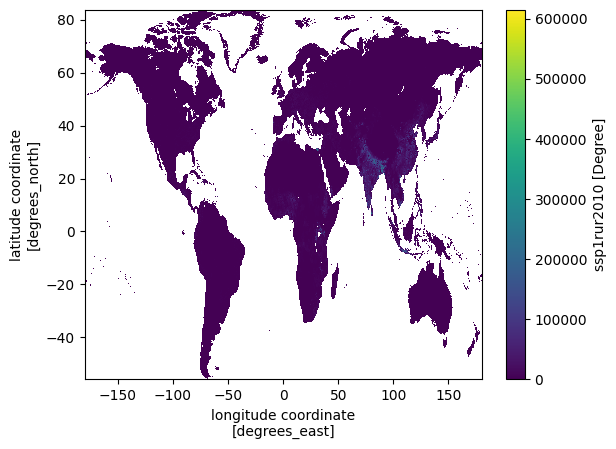

In [4]:
pth = pathlib.Path.cwd() / '..' / '..' / 'tests' / 'test_data'
grid = xr.open_dataarray(pth / 'ssp1_2010_rural.nc')
grid.plot()

We can then pull out a shapefile dataset for country borders

In [5]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson"

(-90.0, 90.0)

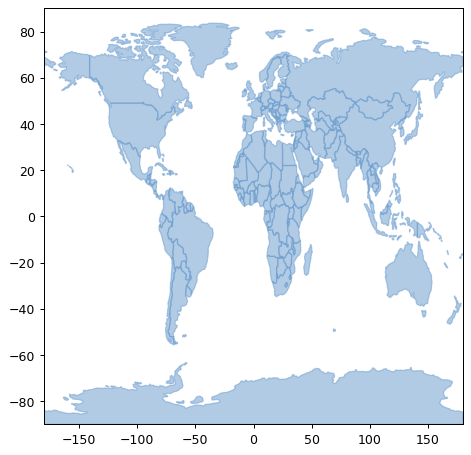

In [7]:
# let's take a look
BLUE = '#6699cc'
fig = pyplot.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)

with collection(url, "r") as inp:
    for f in inp:
        patch = PolygonPatch(f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5)
        ax.add_patch(patch)
        
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Rasterizing with Ptolemy

We start by rasterizing with a 'centroid' approach

In [11]:
r = pt.Rasterize(like=grid)
r.read_shpf(url, idxkey="iso_a3")
idxr_c = r.rasterize(strategy="centroid", verbose=True)
idxr_c

<xarray.DataArray 'iso_a3' (lat: 1114, lon: 2875)>
array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])
Coordinates:
  * lat      (lat) float64 83.69 83.56 83.44 83.31 ... -55.19 -55.31 -55.44
  * lon      (lon) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
Attributes: (12/177)
    0:        AFG
    1:        AGO
    2:        ALB
    3:        ARE
    4:        ARG
    5:        ARM
    ...       ...
    171:      VNM
    172:      VUT
    173:      YEM
    174:      ZAF
    175:      ZMB
    176:      ZWE

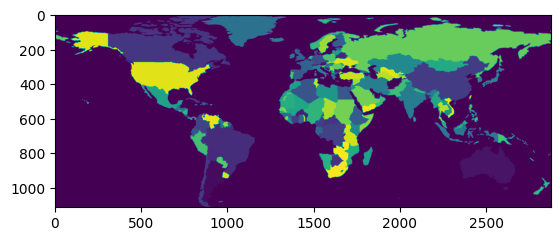

In [12]:
plt.imshow(idxr_c)

We can also use an 'all-touched' approach

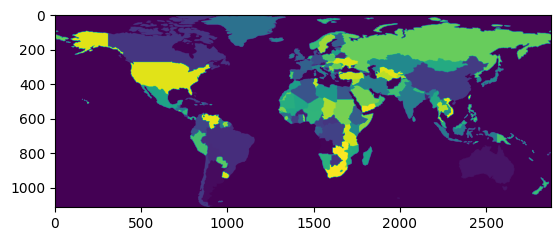

In [14]:
r = pt.Rasterize(like=grid)
r.read_shpf(url, idxkey="iso_a3")
idxr_at = r.rasterize(strategy="all_touched", verbose=True)
plt.imshow(idxr_at)

and see the differences

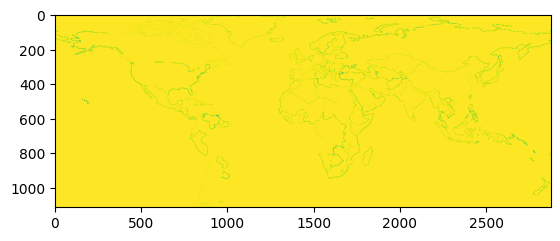

In [15]:
plt.imshow(idxr_c - idxr_at)

# Advanced Rasterization Approaches

- "majority"
- "majority_ignore_nodata"
- "hybrid"
- "weighted"

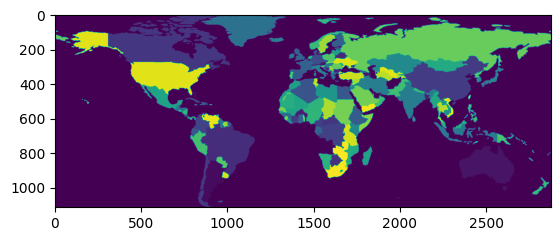

In [16]:
r = pt.Rasterize(like=grid)
r.read_shpf(url, idxkey="iso_a3")
idxr_h = r.rasterize(strategy="hybrid", verbose=True)
plt.imshow(idxr_h)

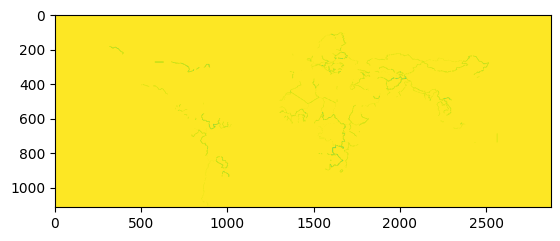

In [17]:
plt.imshow(idxr_h - idxr_at)

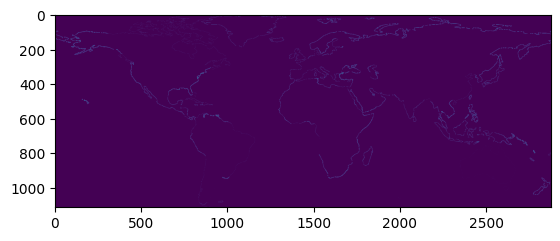

In [18]:
plt.imshow(idxr_h - idxr_c)